# Testy normalności

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.stats as sm_stats

from scipy import stats

Jednym z podstawowych kryteriów stosowalności technik statystycznych jest **rozkład danych**, do którego konkretna technika zostanie użyta. 

W podstawowych zastosowaniach interesuje nas właściwie jedynie czy rozkład populacji jest normalny, czy nie. Rozkład populacji staramy się ustalić na podstawie zebranej próby, więc w tym celu stosujemy odpowiednie testy statystyczne. 

Najbardziej uniwersalnym i w obecnych czasach najbardziej rozpowszechnionym testem używanym do tego celu jest **test Shapiro-Wilka**.

## Testy normalności - test Shapiro-Wilka
\begin{equation*}
\begin{split}
    H_0&: \text{rozkład badanej cechy jest normalny}\\
    H_1&: \text{rozkład badanej cechy nie jest normalny}
\end{split}
\end{equation*}

Statystyka testowa $\textbf{testu Shapiro-Wilka}$ dana jest wzorem
\begin{equation*}
    T = \frac{\Big( \sum_{i=1}^{[\frac{n}{2}]}a_i(n)(X_{n-i+1:n} - X_{i:n} \Big)^2}{\sum_{i=1}^n(X_i - \overline{X})^2},
\end{equation*}
gdzie $a_i(n)$ są pewnymi stałymi zależnymi od liczności próby, natomiast $[n/2]$ oznacza część całkowitą wyrażenia $n/2$.

Obszar krytyczny ma postać
\begin{equation*}
    W_{\alpha} = (0, w(\alpha, n)],
\end{equation*}
gdzie $w(\alpha, n)$ oznacza kwantyl rzędu $\alpha$ rozkładu statystyki.


In [ ]:
# ?stats.shapiro

## Zadanie 
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) dla rozkładu chi-kwadrat,

c) dla rozkładu wykładniczego,

sporządź histogramy dla wygenerowanych próbek i sprawdź zachowanie się testu Shapiro-Wilka. Przyjmij poziom istotności 0.05.

In [5]:
n = 10

norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
print(stats.shapiro(norm))

norm_error = stats.norm.rvs(size=n, loc=2,scale=0.5) + stats.uniform.rvs(size =n, loc=-0.6, scale=1.2)
print(stats.shapiro(norm_error))

chi = stats.chi2.rvs(size=n, df=5)
print(stats.shapiro(chi))

exp = stats.expon.rvs(size=n, scale=1/2)
print(stats.shapiro(exp))

ShapiroResult(statistic=0.8390753269195557, pvalue=0.04301261156797409)
ShapiroResult(statistic=0.9489638209342957, pvalue=0.6562560796737671)
ShapiroResult(statistic=0.9254687428474426, pvalue=0.4048286974430084)
ShapiroResult(statistic=0.8243941068649292, pvalue=0.0286374781280756)


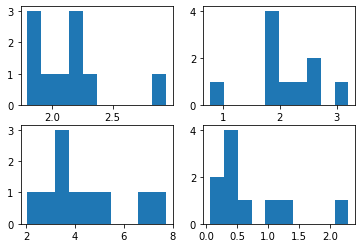

In [7]:
plt.subplot(2, 2, 1)
plt.hist(norm)

plt.subplot(2, 2, 2)
plt.hist(norm_error)

plt.subplot(2, 2, 3)
plt.hist(chi)

plt.subplot(2, 2, 4)
plt.hist(exp)

plt.show()

In [9]:
n = 5000

norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
print(stats.shapiro(norm))

norm_error = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2)
print(stats.shapiro(norm_error))

chi = stats.chi2.rvs(size=n, df=5)
print(stats.shapiro(chi))

exp = stats.expon.rvs(size=n, scale=1/2)
print(stats.shapiro(exp))

ShapiroResult(statistic=0.9993698000907898, pvalue=0.08018350601196289)
ShapiroResult(statistic=0.9993770122528076, pvalue=0.08477047085762024)
ShapiroResult(statistic=0.9169698357582092, pvalue=0.0)
ShapiroResult(statistic=0.8133360743522644, pvalue=0.0)


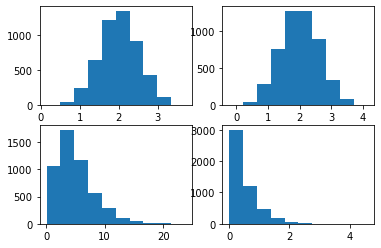

In [10]:
plt.subplot(2, 2, 1)
plt.hist(norm)

plt.subplot(2, 2, 2)
plt.hist(norm_error)

plt.subplot(2, 2, 3)
plt.hist(chi)

plt.subplot(2, 2, 4)
plt.hist(exp)

plt.show()

In [11]:
n = 5000
k = 10000
rej = []

for i in range(k):
    norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
    rej.append(stats.shapiro(norm)[1] < 0.05)

sum(rej)/k  # suma p-wartości (to jest rozkład normalny) <-- test trzyma poziom istotności (brak błędów I-rodzaju)

0.0425

In [12]:
n = 5000
k = 10000
rej = []

for i in range(k):
    cau = stats.cauchy.rvs(size=n)
    rej.append(stats.shapiro(cau)[1] > 0.05)  # tu jest odwrócony znak (patrz powyżej) !!

sum(rej)/k  # suma p-wartości (to nie jest rozkład normalny) <-- odporność na błędy II-rodzaju

0.0

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki i sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

In [14]:
alpha = 0.05

mu = np.linspace(-5, 5, 50)
sigma = np.round(stats.uniform.rvs(size=50, loc=0, scale=2), 2)
nobs = [5, 10, 20, 50, 100, 500, 1000]

for n in nobs:
    
    reject = 0
    print("---------------------------------")
    
    for m, s in zip(mu, sigma):
        
        x = stats.norm.rvs(size=n, loc=m, scale=s)
        pval = stats.shapiro(x)[1]
        print("P-value testu Shapiro-Wilka dla mu={}, sigma={}, n={}: {}".format(m, s, n, pval))
        if pval < alpha: reject += 1
    
    print("---------------------------------")
    print("Hipoteza o normalności została odrzucona {} razy dla n={}".format(reject, n))

---------------------------------
P-value testu Shapiro-Wilka dla mu=-5.0, sigma=0.8, n=5: 0.9835338592529297
P-value testu Shapiro-Wilka dla mu=-4.795918367346939, sigma=1.74, n=5: 0.5746623277664185
P-value testu Shapiro-Wilka dla mu=-4.591836734693878, sigma=1.74, n=5: 0.6514091491699219
P-value testu Shapiro-Wilka dla mu=-4.387755102040816, sigma=1.85, n=5: 0.41296249628067017
P-value testu Shapiro-Wilka dla mu=-4.183673469387755, sigma=0.92, n=5: 0.6151838898658752
P-value testu Shapiro-Wilka dla mu=-3.979591836734694, sigma=0.13, n=5: 0.8182680606842041
P-value testu Shapiro-Wilka dla mu=-3.7755102040816326, sigma=0.56, n=5: 0.16560064256191254
P-value testu Shapiro-Wilka dla mu=-3.571428571428571, sigma=1.32, n=5: 0.6487782001495361
P-value testu Shapiro-Wilka dla mu=-3.36734693877551, sigma=0.22, n=5: 0.7346254587173462
P-value testu Shapiro-Wilka dla mu=-3.163265306122449, sigma=1.64, n=5: 0.6171701550483704
P-value testu Shapiro-Wilka dla mu=-2.9591836734693877, sigma=1.18, n

/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki. Przy generowaniu próbki dodaj pewien błąd. Sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

In [17]:
alpha = 0.05

mu = np.linspace(-5, 5, 50)
sigma = np.round(stats.uniform.rvs(size=50, loc=0, scale=2), 2)
nobs = [5, 10, 20, 50, 100, 500, 1000]

for n in nobs:
    
    reject = 0
    print("---------------------------------")
    
    for m, s in zip(mu, sigma):
        
        x = stats.norm.rvs(size=n, loc=m, scale=s) + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2)  # dodany drugi rozkład
        pval = stats.shapiro(x)[1]
        print("P-value testu Shapiro-Wilka dla mu={}, sigma={}, n={}: {}".format(m, s, n, pval))
        if pval < alpha: reject += 1
    
    print("---------------------------------")
    print("Hipoteza o normalności została odrzucona {} razy dla n={}".format(reject, n))

---------------------------------
P-value testu Shapiro-Wilka dla mu=-5.0, sigma=0.44, n=5: 0.038713354617357254
P-value testu Shapiro-Wilka dla mu=-4.795918367346939, sigma=1.59, n=5: 0.9122469425201416
P-value testu Shapiro-Wilka dla mu=-4.591836734693878, sigma=1.13, n=5: 0.2178926020860672
P-value testu Shapiro-Wilka dla mu=-4.387755102040816, sigma=1.45, n=5: 0.5672781467437744
P-value testu Shapiro-Wilka dla mu=-4.183673469387755, sigma=0.25, n=5: 0.18618060648441315
P-value testu Shapiro-Wilka dla mu=-3.979591836734694, sigma=0.89, n=5: 0.22072145342826843
P-value testu Shapiro-Wilka dla mu=-3.7755102040816326, sigma=1.85, n=5: 0.32992610335350037
P-value testu Shapiro-Wilka dla mu=-3.571428571428571, sigma=1.37, n=5: 0.5792185068130493
P-value testu Shapiro-Wilka dla mu=-3.36734693877551, sigma=1.07, n=5: 0.9169148802757263
P-value testu Shapiro-Wilka dla mu=-3.163265306122449, sigma=1.74, n=5: 0.39854151010513306
P-value testu Shapiro-Wilka dla mu=-2.9591836734693877, sigma=1.

P-value testu Shapiro-Wilka dla mu=5.0, sigma=1.26, n=1000: 0.08577294647693634
---------------------------------
Hipoteza o normalności została odrzucona 7 razy dla n=1000


## ***Metody graficzne

- histogram (z naniesionym fitem rozkładu normalnego)

- $qq$-plot:
    * oś x - teoretyczne kwantyle z rozkładu normalnego
    * oś y - empiryczne kwantyle wyznaczone na podstawie próby
    
Punkty na wykresie powinny układać wzdłuż prostej $y=x$.

In [ ]:
# ?stats.norm.fit
# ?sm.qqplot

In [25]:
n = 100

norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
norm2 = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-2, scale=4)
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)

ShapiroResult(statistic=0.9862136840820312, pvalue=0.3869529664516449)


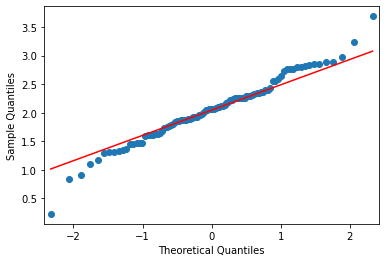

In [26]:
sm.qqplot(norm, stats.norm, line='q')
print(stats.shapiro(norm))
plt.show()

ShapiroResult(statistic=0.9888729453086853, pvalue=0.5746114253997803)


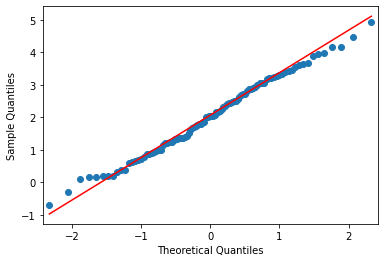

In [27]:
sm.qqplot(norm2, stats.norm, line='q')
print(stats.shapiro(norm2))
plt.show()

ShapiroResult(statistic=0.847598671913147, pvalue=9.677775913985442e-09)


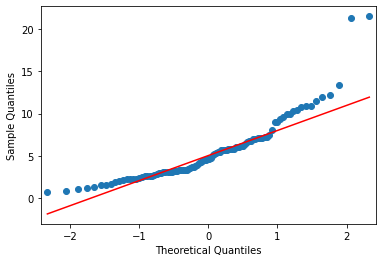

In [28]:
sm.qqplot(chi, stats.norm, line='q')
print(stats.shapiro(chi))
plt.show()

ShapiroResult(statistic=0.8381003141403198, pvalue=4.415258381129661e-09)


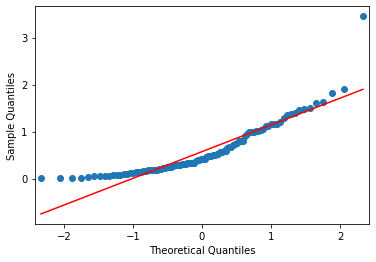

In [29]:
sm.qqplot(exp, stats.norm, line='q')
print(stats.shapiro(exp))
plt.show()

## Zadanie
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) rozkładu chi-kwadrat,

c) rozkładu wykładniczego,

sporządź histogramy z naniesionym filtrem rozkładu normalnego oraz wykresy $qq$-plot. Na podstawie otrzymanych rysunków oceń czy rozkład jest normalny.

In [47]:
n = 10000

norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
norm_error = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2)
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)
cau = stats.cauchy.rvs(size=n)  # tzw. rozkład "gruboogonowy"

2.005660768842956 0.502910210135184
1.9982780272826963 0.6104870044949952
4.965922034061238 3.1549300790826105
0.5009288292692956 0.5071349796685651
0.5009288292692956 0.5071349796685651


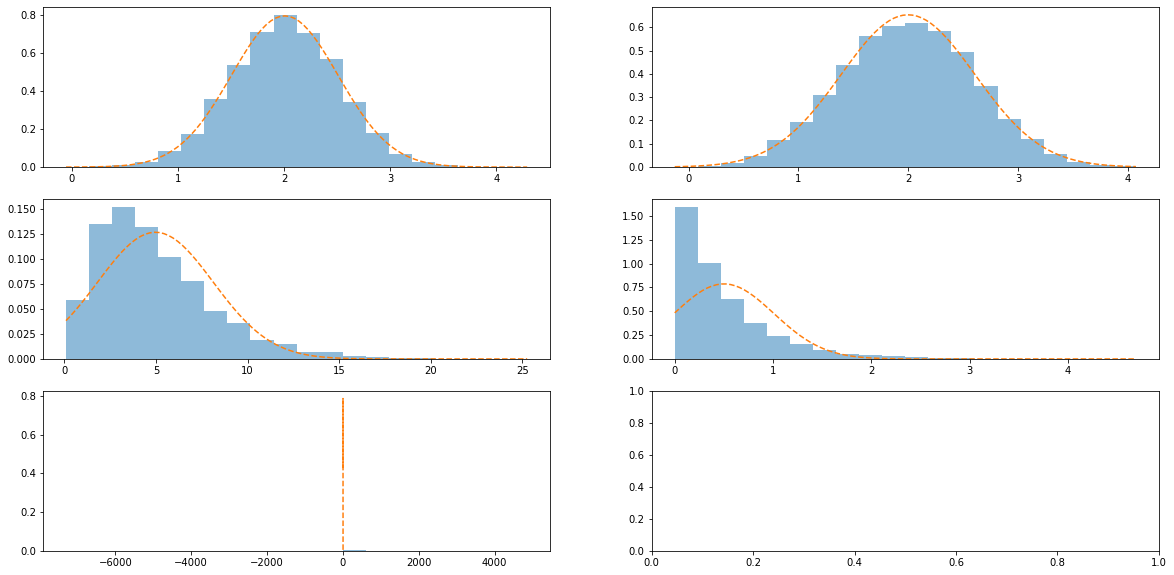

In [48]:
# histogram z naniesionym filtrem rozkładu normalnego

m1, s1 = stats.norm.fit(norm)
print(m1, s1)

m2, s2 = stats.norm.fit(norm_error)
print(m2, s2)

m3, s3 = stats.norm.fit(chi)
print(m3, s3)

m4, s4 = stats.norm.fit(exp)
print(m4, s4)

m5, s5 = stats.norm.fit(exp)
print(m5, s5)

fig, ax = plt.subplots(3, 2, figsize=(20, 10))
N_bins = 20

x_range = np.linspace(norm.min(), norm.max(), 100)
ax[0, 0].hist(norm, bins=N_bins, density=True, alpha=0.5)
ax[0, 0].plot(x_range, stats.norm.pdf(x_range, m1, s1), '--')

x_range = np.linspace(norm_error.min(), norm_error.max(), 100)
ax[0, 1].hist(norm_error, bins=N_bins, density=True, alpha=0.5)
ax[0, 1].plot(x_range, stats.norm.pdf(x_range, m2, s2), '--')

x_range = np.linspace(chi.min(), chi.max(), 100)
ax[1, 0].hist(chi, bins=N_bins, density=True, alpha=0.5)
ax[1, 0].plot(x_range, stats.norm.pdf(x_range, m3, s3), '--')

x_range = np.linspace(exp.min(), exp.max(), 100)
ax[1, 1].hist(exp, bins=N_bins, density=True, alpha=0.5)
ax[1, 1].plot(x_range, stats.norm.pdf(x_range, m4, s4), '--')

x_range = np.linspace(norm.min(), norm.max(), 100)
ax[2, 0].hist(cau, bins=N_bins, density=True, alpha=0.5)
ax[2, 0].plot(x_range, stats.norm.pdf(x_range, m5, s5), '--')

## ***Inne testy do badania normalności

* testy oparte na kurtozie i skośności:
    - [test D'Agostino $K^2$](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test): `scipy.stats.normaltest`;

    - [test Jarque–Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test): `scipy.stats.jarque_bera`;
    
* testy oparte na dystrybuancie empirycznej:
    - [test Kolmogorova–Smirnova](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test): `scipy.stats.kstest`;
    
    - [test Lilliefors](https://en.wikipedia.org/wiki/Lilliefors_test): `statsmodels.stats.diagnostic.lilliefors`;

## Test typu omnibus D’Agostino-Pearsona oparty o kurtozę i skośność
Łącząc dwa testy otrzymuje się test czuły na odstępstwa od normalności zarówno w postaci niezerowej skośności jak i kurtozy istotnie różniej od 3.

Statystyką testową jest
$$
K^2=(Z(\sqrt{b_1}))^2+ (Z(b_2))^2,
$$
gdzie $Z(\sqrt{b_1})$ to  statystyka  testowa  testu  opartego  o  skośność  a $Z(b_2)$  to  statystyka  testowa  testu opartego o kurtozę.

Asymptotyczny rozkład tej statystyki to rozkład $\chi^2$.

Ponadto:
$m_k = \frac{1}{n}\sum_{i=1}^n (x_i -\overline{x})^k$, $\sqrt{b_1} = \frac{m_3}{m_2^{3/2}}$, $b_2 = \frac{m4}{m_2^2}-3$.

## Test typu omnibus Jarque-Bera oparty o kurtozę i skośność
Innym testem opartym o kurtozę i skośność jest test Jarque-Bera. Statystyka testowa w przypadku tego testu ma łatwiejszą postać niż dla testu D’Agostino-Pearsona. Traci się jednak na niedokładnym oszacowaniu wartości krytycznych przy niewielkich wielkościach próby. Asymptotycznie ten test jest tak samo mocny jak test D’Agostino-Pearsona, ale na asymptotykę można liczyć jedynie w przypadku dużych prób.

Statystyka testowa ma postać:
$$
    \text{JB} = \frac{n}{6}\Big((\sqrt{b_1})^2 + \frac{1}{4}(b_2-3)^2\Big).
$$


## Test Kołmogorova-Smirnova

Test oparty o odległość supremum pomiędzy dystrybuantami empiryczną $F_n$ i teoretyczną $F$
$$
d(F_n, F) = \sup_{x}|F_n(x) - F(x)|.
$$

Statystka testowa oparta o powyższą odległość sprowadza się do liczenia maksimum modułu różnicy dystrybuant w punktach skoku dystrybuanty empirycznej:
$$
D = \max_{x_i}|F_n(x_i) - F(x_i)|.
$$

Rozkład statystyki testowej można wyznaczyć w sposób dokładny dla prostej hipotezy zerowej, a więc dla porównania z jednym określonym rozkładem. Asymptotycznie, ta statystyka przemnożona przez $\sqrt{n}$ ma rozkład Kołmogorowa.

Test ten pomimo łatwego opisu probabilistycznego nie jest stosowany z uwagi na moc niższą niż konkurencja.

## Test Lillieforsa

Ten test to modyfikacja testu Kołmogorowa-Smirnowa zaproponowana przez Huberta Lillieforsa, pozwalająca na testowanie zgodności z całą rodziną rozkładów normalnych, bez znajomości parametrów średniej i odchylenia standardowego (test Kołmogorowa-Smirnowa pozwala na zbadanie zgodności z jednym określonym rozkładem).

Statystyka testowa w przypadku testu Lillieforsa wygląda tak samo jak w przypadku testu Kołmogorowa-Smirnowa. Różnica polega na zastosowaniu innego rozkładu dla statystyki testowej (przybliżenie rozkładu dokładnego), uwzględniającego to, że hipoteza zerowa jest hipotezą złożoną.

In [ ]:
# ?stats.normaltest
# ?stats.jarque_bera
# ?stats.kstest
# ?sm_stats.diagnostic.lilliefors

In [52]:
n = 10000

norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
norm_error = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2)
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)
cau = stats.cauchy.rvs(size=n)  # tzw. rozkład "gruboogonowy"

In [53]:
print(stats.shapiro(norm))
print(stats.normaltest(norm))
print(stats.jarque_bera(norm))

ShapiroResult(statistic=0.9998121857643127, pvalue=0.5712614059448242)
NormaltestResult(statistic=1.6466103283720825, pvalue=0.4389783585889324)
Jarque_beraResult(statistic=1.6217761946774885, pvalue=0.4444631643398209)


/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [54]:
print(stats.shapiro(norm_error))
print(stats.normaltest(norm_error))
print(stats.jarque_bera(norm_error))

ShapiroResult(statistic=0.9996790289878845, pvalue=0.10471770167350769)
NormaltestResult(statistic=5.737093937784912, pvalue=0.05678137176713715)
Jarque_beraResult(statistic=5.2596278955789675, pvalue=0.07209187384358695)


In [55]:
print(stats.shapiro(chi))
print(stats.normaltest(chi))
print(stats.jarque_bera(chi))

ShapiroResult(statistic=0.9178943634033203, pvalue=0.0)
NormaltestResult(statistic=2150.6698853114563, pvalue=0.0)
Jarque_beraResult(statistic=4651.934838750419, pvalue=0.0)


In [56]:
print(stats.shapiro(exp))
print(stats.normaltest(exp))
print(stats.jarque_bera(exp))

ShapiroResult(statistic=0.8249776363372803, pvalue=0.0)
NormaltestResult(statistic=3839.5272275060715, pvalue=0.0)
Jarque_beraResult(statistic=16089.646801402609, pvalue=0.0)


In [58]:
print(stats.shapiro(cau))
print(stats.normaltest(cau))
print(stats.jarque_bera(cau))

ShapiroResult(statistic=0.040489017963409424, pvalue=0.0)
NormaltestResult(statistic=32304.553127595704, pvalue=0.0)
Jarque_beraResult(statistic=6532547064.492557, pvalue=0.0)


## Zadanie
Napisz funkcję, która dla dowolnej próbki zwróci ramkę danych z wyznaczonymi statystykami testowymi i $p$-wartościami dla poznanych testów normalności.

In [69]:
def normal_tests(x):
    return pd.DataFrame(data = np.array([[stats.shapiro(x)[0], stats.shapiro(x)[1]],
                                         [stats.normaltest(x)[0], stats.normaltest(x)[1]],
                                         [stats.jarque_bera(x)[0], stats.jarque_bera(x)[1]]
                                        ]),
                        index=['ShapiroResult', 'NormaltestResult', 'Jarque_beraResult'],
                        columns=['statistic', 'pvalue']
                       )

## Zadanie
Wczytaj dane `mtcars.csv` i sprawdź normalność każdej z kolumn (za pomocą testów statystycznych oraz metod graficznych). 

In [59]:
mtcars = pd.read_csv("../data/mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


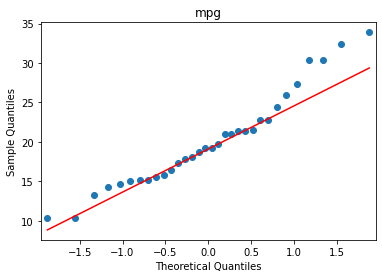

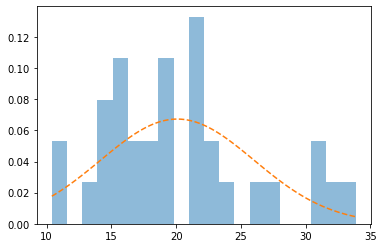

                   statistic    pvalue
ShapiroResult       0.947565  0.122881
NormaltestResult    2.714135  0.257415
Jarque_beraResult   2.241155  0.326091


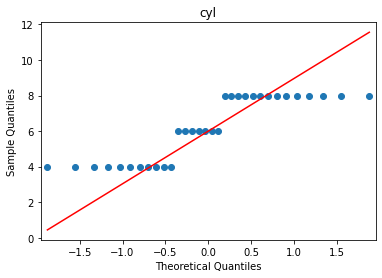

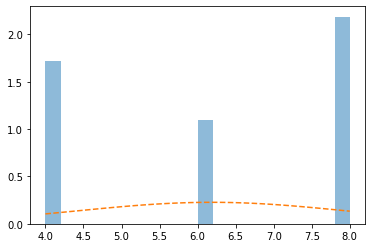

                   statistic        pvalue
ShapiroResult       0.753310  6.058379e-06
NormaltestResult   38.526353  4.306345e-09
Jarque_beraResult   3.946399  1.390114e-01


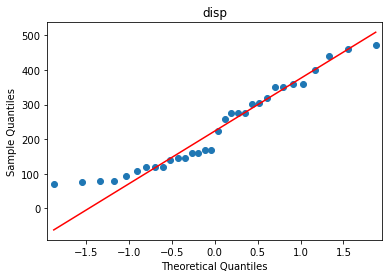

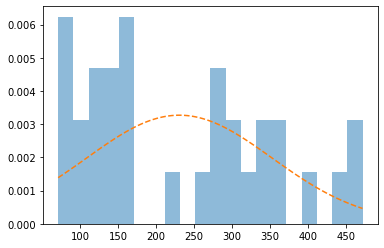

                   statistic    pvalue
ShapiroResult       0.920013  0.020806
NormaltestResult    5.000393  0.082069
Jarque_beraResult   2.437707  0.295569


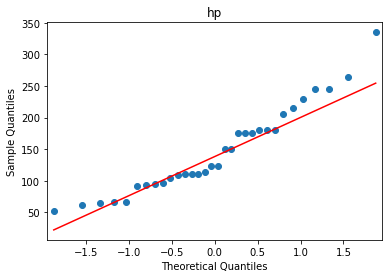

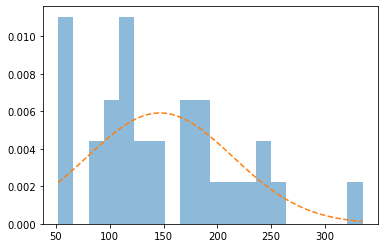

                   statistic    pvalue
ShapiroResult       0.933419  0.048807
NormaltestResult    3.972313  0.137222
Jarque_beraResult   3.095820  0.212692


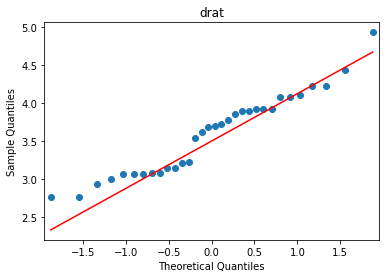

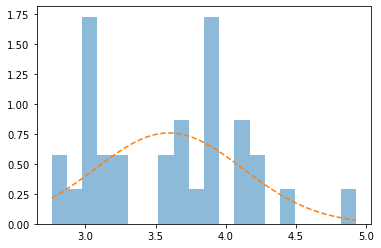

                   statistic    pvalue
ShapiroResult       0.945884  0.110060
NormaltestResult    0.772834  0.679487
Jarque_beraResult   0.840234  0.656970


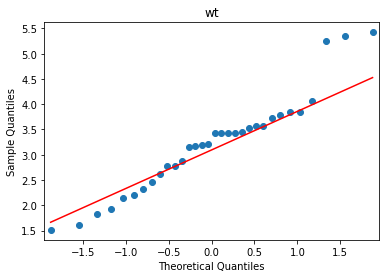

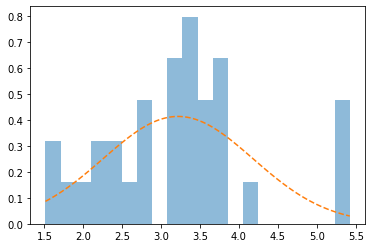

                   statistic    pvalue
ShapiroResult       0.943258  0.092656
NormaltestResult    1.880310  0.390567
Jarque_beraResult   1.090038  0.579831


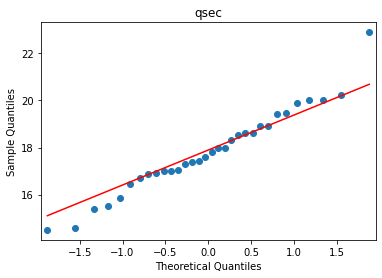

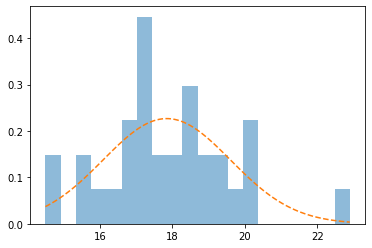

                   statistic    pvalue
ShapiroResult       0.973251  0.593525
NormaltestResult    2.377983  0.304528
Jarque_beraResult   1.207813  0.546672


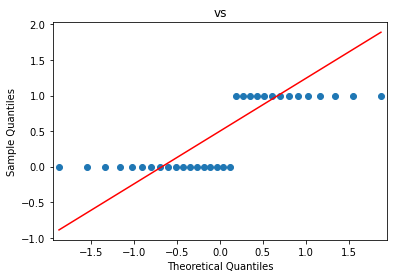

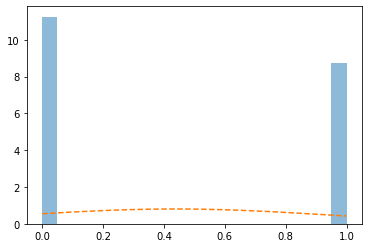

                    statistic        pvalue
ShapiroResult        0.632264  9.737415e-08
NormaltestResult   195.930794  2.845565e-43
Jarque_beraResult    5.338708  6.929697e-02


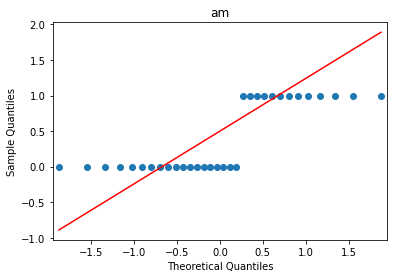

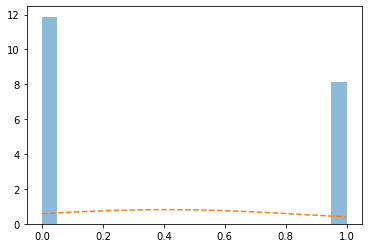

                   statistic        pvalue
ShapiroResult       0.625074  7.836341e-08
NormaltestResult   99.391481  2.614653e-22
Jarque_beraResult   5.361657  6.850637e-02


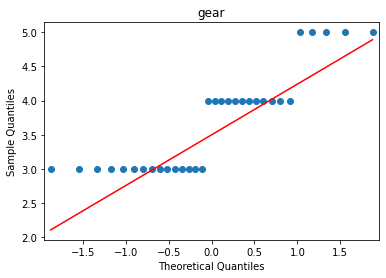

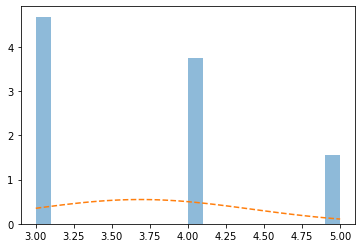

                   statistic    pvalue
ShapiroResult       0.772786  0.000013
NormaltestResult    4.182945  0.123505
Jarque_beraResult   2.826919  0.243300


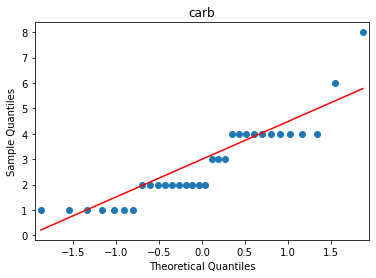

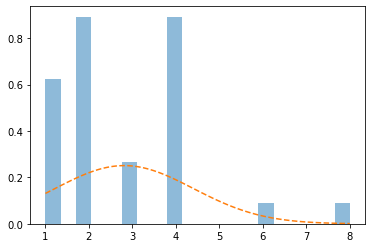

                   statistic    pvalue
ShapiroResult       0.851097  0.000438
NormaltestResult   10.628721  0.004920
Jarque_beraResult   9.624577  0.008129


In [83]:
col_names = list(mtcars.columns)

for col in col_names:
    
    sm.qqplot(mtcars[col], stats.norm, line='q')
    plt.title(col)

    plt.figure()
    m, s = stats.norm.fit(mtcars[col])
    x_range = np.linspace(mtcars[col].min(), mtcars[col].max(), 100)

    plt.hist(mtcars[col], bins=20, density=True, alpha=0.5)
    plt.plot(x_range, stats.norm.pdf(x_range, m, s), '--')

    plt.show()

    print(normal_tests(mtcars[col]))
    